# Figuras del reporte

In [1]:
from utils import RK4

# Solución de la ecuación `poner numero de ecuacion`

In [2]:
def g(t,y):
    return np.sqrt(4*y**2-4*y**4)/(2*y**2)

In [4]:
#extreme values
a,b =-1,0
alpha=0.01
sol2=RK4(g,a,b,alpha,N=1000)
sol2

(array([-1.   , -0.999, -0.998, ..., -0.002, -0.001,  0.   ]),
 array([0.01      , 0.05298033, 0.06930669, ..., 0.99999872, 0.99999977,
               nan]))

## Grafica 1

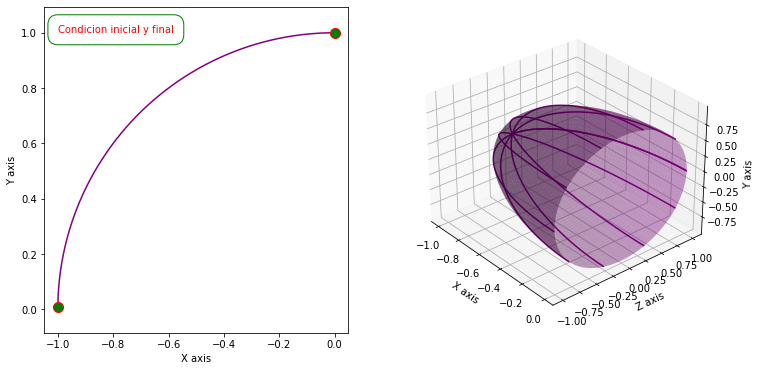

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =-1,0

#initial conditions
xa, xb= 0.01, 1

#dominio de la funcion
t=sol2[0]

#funcion solucion evaluada en cada t
y_t=sol2[1]

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="green", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(-1, xb, 'Condicion inicial y final', color='red', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=1'))

#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()